In [56]:
from Game import Kalaha
from Agent import Agent
import time
import matplotlib.pyplot as plt
import copy
import random
import numpy as np

## Execution Time

This section explores how long it takes to search through the game states at different depths 

* Iterates over a range, and outputs the execution time of those depths

In [2]:
AI = Agent()

depth = []
timings = []
for i in range(0, 9, 1):
    game = Kalaha()
    AI.search_depth = i
    start = time.time()
    
    AI.find_next_move(game)

    end = time.time()
    
    depth.append(i)
    timings.append(round(end - start, 2))
    

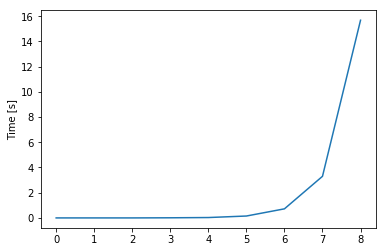

Depth: 0  Time: 0.0 s
Depth: 1  Time: 0.0 s
Depth: 2  Time: 0.0 s
Depth: 3  Time: 0.01 s
Depth: 4  Time: 0.03 s
Depth: 5  Time: 0.15 s
Depth: 6  Time: 0.72 s
Depth: 7  Time: 3.3 s
Depth: 8  Time: 15.68 s


In [3]:
plt.plot(depth, timings)
plt.ylabel('Time [s]')
plt.show()
for i, timing in enumerate(timings): 
    print("Depth: {}  Time: {} s".format(i, timing))

## Game Development

This section explores how what the evaluation function evaluates to after each round of the game, at different search depths 

In [10]:
def gameplay(depth, human = False, delay = 0):
    game_development = []
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    ai_2 = Agent()
    
    ai_1.search_depth = depth
    ai_2.search_depth = depth
    
    while not game.terminal_test():
        game_development.append(ai_1.evaluate(game.state))
        time.sleep(delay)
        player = game.state[3]

        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game)
            # hole = game.possible_actions()[0]           # <- Stupid Agent 
            hole = random.choice(game.possible_actions()) # <- Random Agent 
            # hole = ai_2.find_next_move(game_copy)       # <- MinMax Agent
            game.take(hole)

        #game.print_board()
    game.finalize_game()
    #game.print_board()
    return game_development

In [7]:
game_series = []
for i in range(1, 8, 1):
    game_series.append(gameplay(depth = i))

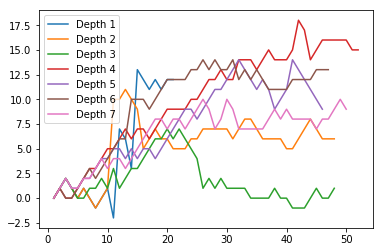

In [4]:
for i, series in enumerate(game_series):
    plt.plot(range(1,len(series) + 1, 1), series, label="Depth {}".format(i + 1))
plt.legend(loc="upper left")
plt.show()

Now replace the MinMax agent for player 2, with the stupid agent in the Gameplay function

In [ ]:
game_series = []
for i in range(1, 8, 1):
    game_series.append(gameplay(depth = i))

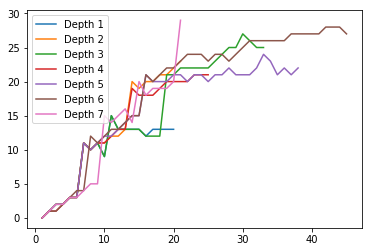

In [8]:
for i, series in enumerate(game_series):
    plt.plot(range(1,len(series) + 1, 1), series, label="Depth {}".format(i + 1))
plt.legend(loc="upper left")
plt.show()

## Win Rates

In [57]:
def gameplay(depth, human = False, delay = 0):
    game_development = []
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    ai_2 = Agent()
    
    ai_1.search_depth = depth
    ai_2.search_depth = depth
    
    while not game.terminal_test():
        game_development.append(ai_1.evaluate(game.state))
        time.sleep(delay)
        player = game.state[3]

        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game)
            hole = random.choice(game.possible_actions()) # <- Random Agent 
            # hole = ai_2.find_next_move(game_copy)       # <- MinMax Agent
            game.take(hole)

        #game.print_board()
    game.finalize_game()
    #game.print_board()
    return game.state[2][0] - game.state[2][1]

In [58]:
game_series = np.zeros(100)
for i in range(0, 100, 1):
    evaluation = gameplay(depth = 1)
    game_series[i] = evaluation 

In [72]:
win_rate = np.size(np.where(game_series < 0)) / np.size(game_series)
print("Win Rate: {}".format(win_rate))

Win Rate: 0.030927835051546393


In [70]:
a = np.size(np.where(game_series > 0))
b = np.size(np.where(game_series < 0))

In [71]:
a / b

32.333333333333336

In [73]:
print(a, b)

97 3


3.0927835051546393